HOMEWORK 2
NAME: VID CHAN










In [54]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
import random

QUESTION 1: FeedForward

In [18]:
### 3: Write out forward pass function in python
def relu(z):
  for j in range(0,len(z)):
    z[j] = [max(0,i) for i in z[j]]
  return z
# activation function
def sigmoid(z):
    return 1/(1+np.exp(-z))

def ff_nn_Relu(w,b,v,c,x):
  h = relu(np.dot(x,w) + b)
  return sigmoid(sum(np.dot(h,v)+c))


In [19]:
### 4: class probabilities
w = [[1,-1,0,1],[0,0,0.5,1]]
b = [0,0,1,0]
v = [1,0,-1,1]
c = 1 
X = [[1,-1],[0,-1],[0,1]]

# class 1 probability 
prob1 = ff_nn_Relu(w,b,v,c,X)

# class 2 probability
prob2 = 1- prob1
print([prob1,prob2])

[0.9241418199787566, 0.07585818002124345]


QUESTION 2: GRADIENT DESCENT

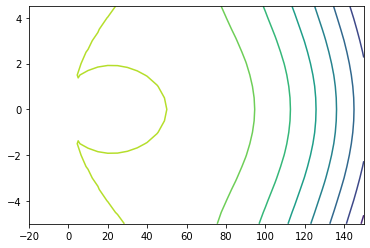

In [26]:
x = np.arange(-20, 155, 5)
y = np.arange(-5,5, 0.5)
X, Y = np.meshgrid(x, y)

Z = (3-X**3) + 50 * (2*Y**2-X)**2

### 1 Partial Derivates with respect to x & y: 

#df_dx = -3*x**2 - 200*y**2 + 100*x
#df_dy = 800*y**3 - 400*x*y

### 2 Contur Plot of the function

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)


In [28]:
# 3. 
def grad_f(vector):
    x, y = vector
    df_dx = -3*x**2 - 200*y**2 + 100*x
    df_dy = 800*y**3 - 400*x*y
    return np.array([df_dx, df_dy])

def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    # your code here
    # be sure to store and return the entire trajectory -- i.e. the results at
    # each step -- as a list or array 
    if starting_point is None: 
      pointx = np.random.uniform(-20,120,size=1)
      pointy = np.random.uniform(-3,3,size=1)
      point = [pointx, pointy]
    else:
      point = starting_point
    trajectory = [point]

    for i in range(iterations):
      grad = grad_f(point)
      point = point - learning_rate * grad
      trajectory.append(point)

    return np.array(trajectory)


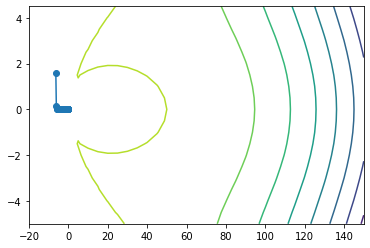

In [30]:
#very small learning rate
# learning rate = 0.0002
np.random.seed(19)
traj = grad_descent(iterations = 1000, learning_rate=0.0002)

x = np.arange(-20,155,5)
y = np.arange(-5,5,0.5)
X,Y = np.meshgrid(x,y)
fig, ax = plt.subplots()
CS = ax.contour(X,Y,Z)
ax.set_autoscale_on(False)

a = traj[:,0]
b = traj[:,1]
plt.plot(a,b,'-o')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in power
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in multiply
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in subtract
  """


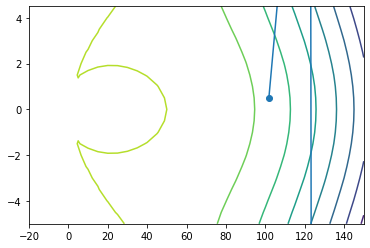

In [33]:
#very small learning rate
# learning rate = 0.001
np.random.seed(25)
traj = grad_descent(iterations = 1000, learning_rate=0.001)

x = np.arange(-20,155,5)
y = np.arange(-5,5,0.5)
X,Y = np.meshgrid(x,y)
fig, ax = plt.subplots()
CS = ax.contour(X,Y,Z)
ax.set_autoscale_on(False)

a = traj[:,0]
b = traj[:,1]
plt.plot(a,b,'-o')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in power
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in subtract
  """


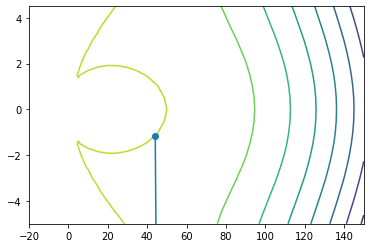

In [31]:
#medium learning rate
# learning rate = 0.5
np.random.seed(35)
traj = grad_descent(iterations = 1000, learning_rate=0.5)

x = np.arange(-20,155,5)
y = np.arange(-5,5,0.5)
X,Y = np.meshgrid(x,y)
fig, ax = plt.subplots()
CS = ax.contour(X,Y,Z)
ax.set_autoscale_on(False)

a = traj[:,0]
b = traj[:,1]
plt.plot(a,b,'-o')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in power
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in multiply
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in subtract
  """


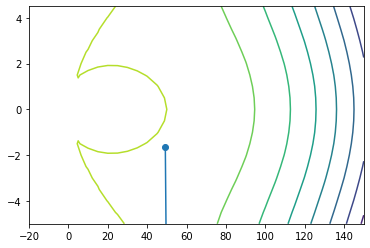

In [32]:
# large learning rate
# learning rate = 15
np.random.seed(50)
traj = grad_descent(iterations = 1000, learning_rate=15)

x = np.arange(-20,155,5)
y = np.arange(-5,5,0.5)
X,Y = np.meshgrid(x,y)
fig, ax = plt.subplots()
CS = ax.contour(X,Y,Z)
ax.set_autoscale_on(False)

a = traj[:,0]
b = traj[:,1]
plt.plot(a,b,'-o')


In [35]:
# 4. Momentum

def grad_f(vector):
    x, y = vector
    df_dx = -3*x**2 - 200*y**2 + 100*x
    df_dy = 800*y**3 - 400*x*y
    return np.array([df_dx, df_dy])

def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
  # your code here

  if starting_point is None: 
      point = np.random.uniform(-5,5,size = 2)
  else:
      point = starting_point
  trajectory = [point]
  v = np.zeros(point.size)



  for i in range(iterations):
      grad = grad_f(point)
      v = alpha * v + epsilon * grad
      point = point - v
      trajectory.append(point)

  return np.array(trajectory)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


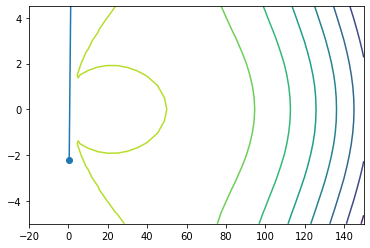

In [36]:
#Large learning rate
np.random.seed(100)
traj = grad_descent_with_momentum(iterations=50, epsilon=10, alpha=.005)

x = np.arange(-20,155,5)
y = np.arange(-5,5,0.5)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.set_autoscale_on(False)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


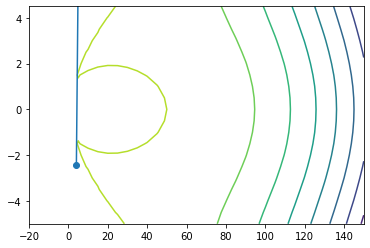

In [37]:
#Different parameters
np.random.seed(150)
traj = grad_descent_with_momentum(iterations=100, epsilon=20, alpha=.05)

x = np.arange(-20,155,5)
y = np.arange(-5,5,0.5)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.set_autoscale_on(False)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


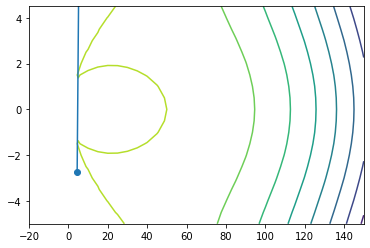

In [38]:
#Different parameters
np.random.seed(200)
traj = grad_descent_with_momentum(iterations=100, epsilon=30, alpha=.1)

x = np.arange(-20,155,5)
y = np.arange(-5,5,0.5)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.set_autoscale_on(False)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

QUESTION 3: BACKPROB

In [85]:
### Question 3.2
# binary cross entropy loss function
def loss(y,y_hat):
  return np.sum(-(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
# sigmoid fun
def sigmoid(x):
  return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
  return sigmoid(x) * (1-sigmoid(x))

def relu(x):
  return np.maximum(x,0)

def relu_derivative(x):
  return np.where(x>0,1,0)

def binary_xent_residual(y,y_hat):
  return (y/y_hat - (1-y)/(1-y_hat))

def pack_params(param_vec):
  w_11,w_12,w_13,w_14,w_21,w_22,w_23,w_24,b_1,b_2,b_3,b_4,v_1,v_2,v_3,v_4, c = param_vec
  W = np.array([[w_11,w_12,w_13,w_14],[w_21,w_22,w_23,w_24]])
  b = np.array([b_1,b_2,b_3,b_4])
  v = np.array([v_1,v_2,v_3,v_4])
  c = np.array([c])
  return((W,b,v,c))

In [104]:
# calculate gradient for Q1 function

def grad_f(param_vec, x,y):
  W,b,v,c = pack_params(param_vec)

  a = np.dot(x,W)+b
  h = relu(a)
  y_a = np.dot(h,v)+c
  y_hat = sigmoid(y_a)
  x = np.array(x)

  dL_dc = np.average(binary_xent_residual(y,y_hat) * sigmoid_derivative(y_a))

  dL_dv1 = np.average(binary_xent_residual(y,y_hat)* sigmoid_derivative(y_a)*h[:,0])
  dL_dv2 = np.average(binary_xent_residual(y,y_hat)* sigmoid_derivative(y_a)*h[:,1])
  dL_dv3 = np.average(binary_xent_residual(y,y_hat)* sigmoid_derivative(y_a)*h[:,2])
  dL_dv4 = np.average(binary_xent_residual(y,y_hat)* sigmoid_derivative(y_a)*h[:,3])

  dL_db1 = np.average(binary_xent_residual(y,y_hat)* sigmoid_derivative(y_a)* v[0]* relu_derivative(a[:,0]))
  dL_db2 = np.average(binary_xent_residual(y,y_hat)* sigmoid_derivative(y_a)* v[1]* relu_derivative(a[:,1]))
  dL_db3 = np.average(binary_xent_residual(y,y_hat)* sigmoid_derivative(y_a)* v[2]* relu_derivative(a[:,2]))
  dL_db4 = np.average(binary_xent_residual(y,y_hat)* sigmoid_derivative(y_a)* v[3]* relu_derivative(a[:,3]))

  dL_dw11 = np.average(binary_xent_residual(y,y_hat)* sigmoid_derivative(y_a)* v[0]* relu_derivative(a[:,0]) *x[:,0])
  dL_dw12 = np.average(binary_xent_residual(y,y_hat)* sigmoid_derivative(y_a)* v[0]* relu_derivative(a[:,1]) *x[:,0])
  dL_dw13 = np.average(binary_xent_residual(y,y_hat)* sigmoid_derivative(y_a)* v[0]* relu_derivative(a[:,2]) *x[:,0])
  dL_dw14 = np.average(binary_xent_residual(y,y_hat)* sigmoid_derivative(y_a)* v[0]* relu_derivative(a[:,3]) *x[:,0])

  dL_dw21 = np.average(binary_xent_residual(y,y_hat)* sigmoid_derivative(y_a)* v[0]* relu_derivative(a[:,0]) *x[:,1])
  dL_dw22 = np.average(binary_xent_residual(y,y_hat)* sigmoid_derivative(y_a)* v[0]* relu_derivative(a[:,1]) *x[:,1])
  dL_dw23 = np.average(binary_xent_residual(y,y_hat)* sigmoid_derivative(y_a)* v[0]* relu_derivative(a[:,2]) *x[:,1])
  dL_dw24 = np.average(binary_xent_residual(y,y_hat)* sigmoid_derivative(y_a)* v[0]* relu_derivative(a[:,3]) *x[:,1])

  # gradient vector output:
  return np.array([dL_dw11,dL_dw12,dL_dw13,dL_dw14,dL_dw21,dL_dw22,
                   dL_dw23,dL_dw24,dL_db1,dL_db2,dL_db3,dL_db4,
                   dL_dv1,dL_dv2,dL_dv3,dL_dv4,
                   dL_dc])





In [105]:
### Q 3.3
# size of the dataset
n = 300
x1 = np.concatenate([np.random.uniform(low=-3,high = 0, size=(n,)), np.random.uniform(low=0, high = 3, size =(n,))])
y1 = np.concatenate([np.random.uniform(low=-3,high = 0, size=(n,)), np.random.uniform(low=0, high = 3, size =(n,))])
x2 = np.concatenate([np.random.uniform(low=-3,high = 0, size=(n,)), np.random.uniform(low=0, high = 3, size =(n,))])
y2 = np.concatenate([np.random.uniform(low=-3,high = 0, size=(n,)), np.random.uniform(low=0, high = 3, size =(n,))])


x = np.concatenate([x1,x2])
y = np.concatenate([y1,y2])
z = np.concatenate([np.repeat(0,2*n), (np.repeat(1,2*n))])

vals = []
for i in range(0,4*n):
  vals.append([x[i],y[i]])

plotdf = pd.DataFrame()
plotdf['x'] = pd.Series(x)
plotdf['y'] = pd.Series(y)
plotdf['z'] = pd.Series(z)


In [106]:
### Question 3.4

def grad_descent(x,y, iterations = 10, learning_rate = 1e-2):
  point = np.random.uniform(-.1,.1,size=17).astype("float128")
  trajectory = [point]
  losses = [loss(y,ff_nn_Relu(*pack_params(point),x))]

  for i in range(iterations):
    grad = grad_f(point, x, y)
    point = point + learning_rate * grad
    trajectory.append(point)
    losses.append(loss(y,ff_nn_Relu(*pack_params(point),x)))
  return (np.array(trajectory), losses)

In [109]:
# apply the gradient des fun to the XOR
np.random.seed(10)
traj,losses = grad_descent(vals,z, iterations = 10, learning_rate = 1e-2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


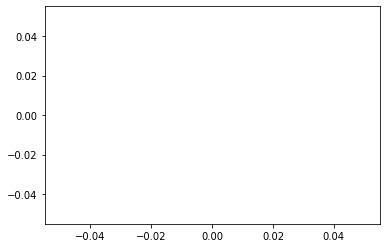

In [110]:
plt.plot(losses)
# not sure why it doesn't give me the line.

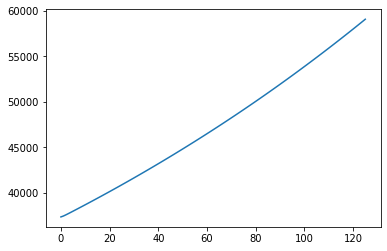

In [112]:
### 3.5 with momentum

def grad_descent_with_momentum(x,y, iterations = 10, alpha=0.9,epsilon = 10):
  point = np.random.uniform(-.1,.1,size=17).astype("float128")
  trajectory = [point]
  losses = [loss(y,ff_nn_Relu(*pack_params(point),x))]
  v = np.zeros(point.size)

  for i in range(iterations):
    grad = grad_f(point, x, y)
    v = alpha*v + epsilon*grad
    point = point -v
    trajectory.append(point)
    losses.append(loss(y,ff_nn_Relu(*pack_params(point),x)))
  return (np.array(trajectory), losses)


np.random.seed(13)
traj, losses = grad_descent_with_momentum(vals, z, iterations = 125, alpha= 0.3, epsilon = 0.01)
plt.plot(losses)

NameError: ignored

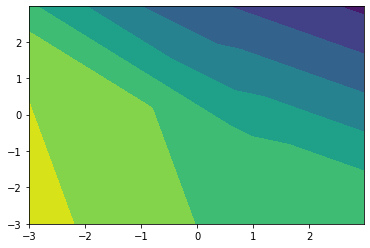

In [116]:
### Question 3.6

def yhat(x,W,b,v,c):
  h = relu(np.dot(x,W) + b)
  y = sigmoid(np.dot(h,v) + c)
  return y

delta = 0.025
x1 = np.arange(-3.0,3.0,delta)
x2 = np.arange(-3,3,delta)
X1,X2 = np.meshgrid(x1,x2)

YHAT = yhat(np.array((X1.ravel(),X2.ravel())).T, *pack_params(traj[-1])).reshape(240,240)
fig, ax = plt.subplots()
CS = ax.contourf(X1,X2,YHAT)

plt.scatter(plotdf.x, plotdf.y, c = plotdf['z'].apply(lambda x: colors[x]))